In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('Housing.csv')

In [3]:
data1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data1.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Data Preparation

In [6]:
#Converting Yes and No values  to 1 and 0
data1['mainroad'] = data1['mainroad'].map({'yes':1, 'no': 0})
data1['guestroom'] = data1['guestroom'].map({'yes':1, 'no': 0})
data1['basement']= data1['basement'].map({'yes':1, 'no': 0})
data1['hotwaterheating']= data1['hotwaterheating'].map({'yes':1, 'no':0})
data1['airconditioning']= data1['airconditioning'].map({'yes':1, 'no':0})
data1['prefarea'] =data1['prefarea'].map({'yes':1, 'no':0})

In [7]:
data1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
#How to handle categorical data
status = pd.get_dummies(data1['furnishingstatus'])

In [9]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [10]:
status = pd.get_dummies(data1['furnishingstatus'],drop_first=True)

In [11]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [12]:
data1 = pd.concat([data1,status] ,axis=1)

In [13]:
data1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [14]:
#drop variable from dataset
data1.drop(['furnishingstatus'],axis=1,inplace=True)

In [15]:
data1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [16]:
#adding variables to dataset
data1['areaperbedroom'] = data1['area']/ data1['bedrooms']

In [17]:
data1['bbratio'] = data1['bathrooms']/ data1['bedrooms']

In [18]:
data1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [19]:
#Rescaling tha dataset reducing the large data value to mormalized values that gives best model
def normalize(x):
    return( (x-np.min(x)) / (max(x) - min(x)))
data1=data1.apply(normalize)

In [20]:
data1.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [21]:
#deffining variables
x = data1[['area','bedrooms','bathrooms','stories','mainroad',
          'guestroom','basement','hotwaterheating','airconditioning',
          'parking','prefarea','semi-furnished','unfurnished',
         'areaperbedroom','bbratio']]
y = data1['price']
 

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y, train_size=0.7, test_size = 0.3, random_state=100)

In [23]:
# Building the model
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
c1m_1 = sm.OLS(y_train,x_train).fit()

In [24]:
print(c1m_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Tue, 26 May 2020   Prob (F-statistic):           4.56e-82
Time:                        15:33:23   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

#Checking for VIF

In [25]:
def vif_cal(imput_data,dependent_col):
    vif_df = pd.DataFrame(columns=['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col],axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().requared
        vif = round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i],vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)    

In [26]:
#vif_cal(input_data=data1, dependent_col='price')

In [27]:
#correlation matrix
%matplotlib inline

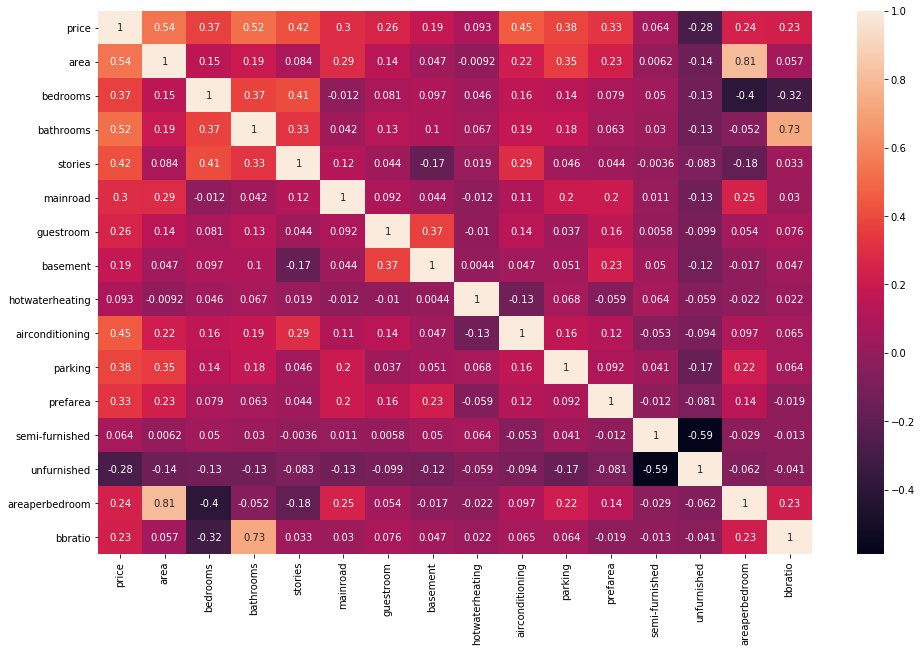

In [28]:
plt.figure(figsize= (16,10))
sns.heatmap(data1.corr(),annot=True)

In [29]:
#making mosel more suitable
x_train=x_train.drop('bbratio',1)

In [30]:
c1m_2 = sm.OLS(y_train,x_train).fit()

In [31]:
print(c1m_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Tue, 26 May 2020   Prob (F-statistic):           6.46e-83
Time:                        15:33:24   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036     

In [32]:
x_train = x_train.drop('bedrooms', 1)

In [33]:
c1m_3 = sm.OLS(y_train,x_train).fit()

In [34]:
print(c1m_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Tue, 26 May 2020   Prob (F-statistic):           1.66e-83
Time:                        15:33:24   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.018     

In [35]:
x_train=x_train.drop('semi-furnished',1)

In [36]:
c1m_4 = sm.OLS(y_train,x_train).fit()

In [37]:
print(c1m_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     66.51
Date:                Tue, 26 May 2020   Prob (F-statistic):           1.99e-84
Time:                        15:33:24   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -741.1
Df Residuals:                     368   BIC:                            -689.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.016     

In [38]:
x_train =x_train.drop('basement',1)

In [39]:
c1m_5 =sm.OLS(y_train,x_train).fit()

In [40]:
print(c1m_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     71.80
Date:                Tue, 26 May 2020   Prob (F-statistic):           1.18e-84
Time:                        15:33:24   Log-Likelihood:                 381.83
No. Observations:                 381   AIC:                            -739.7
Df Residuals:                     369   BIC:                            -692.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0498      0.015     

In [41]:
x_train = x_train.drop('areaperbedroom', 1)

In [42]:
c1m_6 = sm.OLS(y_train,x_train).fit()

In [43]:
print(c1m_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Tue, 26 May 2020   Prob (F-statistic):           3.13e-84
Time:                        15:33:24   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015     

Making Prediction

In [44]:
x_test_m5 = sm.add_constant(x_test)

In [45]:
x_test_m5 = x_test_m5.drop(['bedrooms','bbratio','areaperbedroom','semi-furnished','basement'], axis=1)

In [46]:
y_pred_m5 =c1m_6.predict(x_test_m5)

Text(0, 0.5, 'Sales')

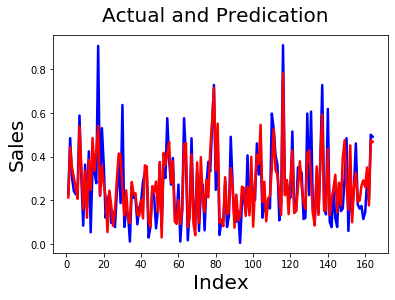

In [47]:
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c,y_pred_m5,color='red', linewidth=2.5, linestyle='-')
fig.suptitle("Actual and Predication", fontsize=20)
plt.xlabel('Index', fontsize=20)
plt.ylabel('Sales', fontsize=20)